In [43]:
%matplotlib inline

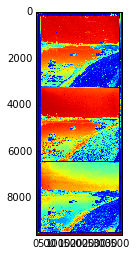

In [44]:
# Fem totes les importacions de les llibreries
import numpy as np
import matplotlib.pyplot as plt
import math 
from skimage import io
from scipy import fftpack
from scipy import signal
from scipy import misc
from PIL import Image, ImageDraw 
from scipy import ndimage 
from scipy.misc import imresize 

# Carreguem i mostrem l'imatge
image = io.imread('00029u.png')
plt.imshow(image)

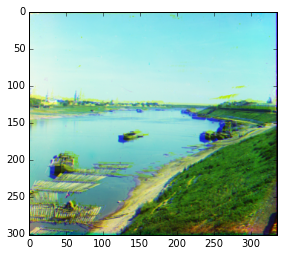

In [45]:

#LOAD IMAGES 
img = Image.open("00029u.png") 
#WARNING SIZE AND SHAPE INDICES ARE UPSIDE DOWN  
size1_size=int(round(img.size[1]/10)) 
size2_size=int(round(img.size[0]/10)) 
img = imresize(img, ( size1_size,size2_size),interp
='bilinear').astype('float') 
img_np = np.array(img) 
x1 = 20; y1 = 20; 
x2 = 25; y2 = 333; 
x3 = 24; y3 = 647; 
w = 336; h = 302; 
im1 = img_np[y1-2:y1+h-2,x1-1:x1+w-1]; 
im2 = img_np[y2-2:y2+h-2,x2-1:x2+w-1]; 
im3 = img_np[y3-2:y3+h-2,x3-1:x3+w-1]; 
I1 = 256*im1.astype('double')/im1.max(); 
I2 = 256*im2.astype('double')/im2.max(); 
I3 = 256*im3.astype('double')/im3.max(); 
RGB=np.zeros([h,w,3],dtype=type(img_np[0,0]))  
RGB[:,:,0]=I3 
RGB[:,:,1]=I2 
RGB[:,:,2]=I1

# Formalizamos la imagen RGB
RGB[:,:,0] = ((RGB[:,:,0] - RGB[:,:,0].min()) / (RGB[:,:,0].max() - RGB[:,:,0].min()))
RGB[:,:,1] = ((RGB[:,:,1] - RGB[:,:,1].min()) / (RGB[:,:,1].max() - RGB[:,:,1].min()))
RGB[:,:,2] = ((RGB[:,:,2] - RGB[:,:,2].min()) / (RGB[:,:,2].max() - RGB[:,:,2].min()))

plt.imshow(RGB)

In [46]:
# Funcio que extreura els barquets de la image generica RGB
def extreurebarquet(image, bloc, zona):
    centreX = 140
    centreY = 165
    # Treiem les coordenades maximes i minimes, que ens va donar el profesor a clase, per treure una area del barquet per escanejar
    # a aquesta area li fiquem el tamany del bloc i el tamany de la zona
    xmin=centreX-bloc-zona
    xmax=centreX+bloc+zona
    ymin=centreY-bloc-zona
    ymax=centreY+bloc+zona
    
    # Amb les coordenades anteriors treiem de la imatge principal el bloc on esta el barquet dels tres canals
    barquetR=RGB[ymin:ymax,xmin:xmax,0]
    barquetG=RGB[ymin:ymax,xmin:xmax,1]
    barquetB=RGB[ymin:ymax,xmin:xmax,2]
    
    # Formalitzem amb la mitja totes les imatges dels barquets
    barquetR = ((barquetR - barquetR.min()) / (barquetR.max() - barquetR.min()))-np.mean(barquetR)
    barquetG = ((barquetG - barquetG.min()) / (barquetG.max() - barquetG.min()))-np.mean(barquetG)
    barquetB = ((barquetB - barquetB.min()) / (barquetB.max() - barquetB.min()))-np.mean(barquetB)
    return barquetR,barquetG,barquetB

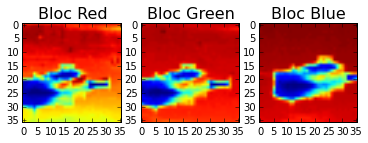

In [47]:
barquetR,barquetG,barquetB = extreurebarquet(RGB,15,3)
# Mostrem les imatges dels barquets per canals
plt.subplot(1,3,1)
plt.imshow(barquetR)
plt.title('Bloc Red', size=16)
plt.subplot(1,3,2)
plt.imshow(barquetG)
plt.title('Bloc Green', size=16)
plt.subplot(1,3,3)
plt.imshow(barquetB)
plt.title('Bloc Blue', size=16)


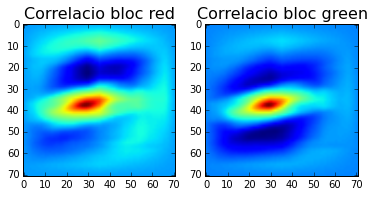

In [48]:
# Fem la correlacio entre els blocks i el template (Bloc blau), mostrem els resultats
NCCBR=signal.correlate2d(barquetR.astype('float'), barquetB.astype('float'), mode='full', boundary='fill', fillvalue=0)
NCCBG=signal.correlate2d(barquetG.astype('float'), barquetB.astype('float'), mode='full', boundary='fill', fillvalue=0)
plt.subplot(1,2,1)
plt.imshow(NCCBR)
plt.title('Correlacio bloc red', size=16)
plt.subplot(1,2,2)
plt.imshow(NCCBG)
plt.title('Correlacio bloc green', size=16)

In [49]:
# Funcio que trobara el punt maxim de la correlacio i retornara el vector que s'ha de desplaçar
def posmax(NCC1):
    rows, columns = np.where(NCC1 == NCC1.max())
    # Agafem el punt mig de la imatge de correlacio.
    puntmig = 35
    return puntmig-rows[0], puntmig-columns[0]

posicioXBR, posicioYBR = posmax(NCCBR)
posicioXBG, posicioYBG = posmax(NCCBG)

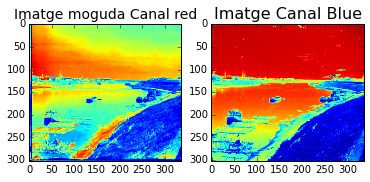

In [50]:
# Funcio que moura l'imatge al centre
def moureimatge(x,y,imatge):
    imatgeX = np.roll(imatge, x)
    imatge2 = np.roll(imatgeX, y, axis=0) 
    return imatge2

RGB[:,:,0] = moureimatge(posicioYBR,posicioXBR,RGB[:,:,0])
plt.subplot(1,2,1)
plt.imshow(RGB[:,:,0])
plt.title('Imatge moguda Canal red', size=14)
plt.subplot(1,2,2)
plt.imshow(RGB[:,:,2])
plt.title('Imatge Canal Blue', size=16)

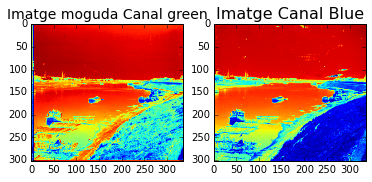

In [51]:
RGB[:,:,1]=moureimatge(posicioYBG,posicioXBG,RGB[:,:,1])
plt.subplot(1,2,1)
plt.imshow(RGB[:,:,1])
plt.title('Imatge moguda Canal green', size=14)
plt.subplot(1,2,2)
plt.imshow(RGB[:,:,2])
plt.title('Imatge Canal Blue', size=16)

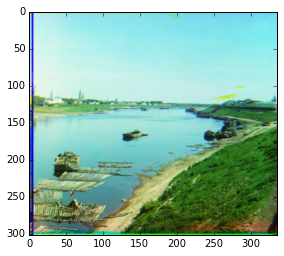

In [52]:
plt.imshow(RGB)

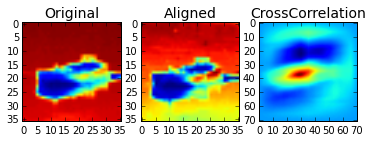

In [59]:
barquetR2,barquetG2,barquetB2=extreurebarquet(RGB,15,3)
plt.subplot(1,3,1)
plt.imshow(barquetB)
plt.title('Original', size=14)
plt.subplot(1,3,2)
plt.imshow(barquetR2)
plt.title('Aligned', size=14)
plt.subplot(1,3,3)
plt.imshow(NCCBR)
plt.title('CrossCorrelation', size=14)

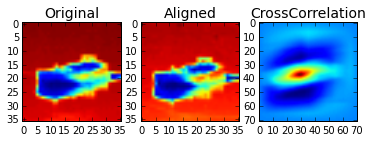

In [60]:
plt.subplot(2,3,1)
plt.imshow(barquetB)
plt.title('Original', size=14)
plt.subplot(2,3,2)
plt.imshow(barquetG2)
plt.title('Aligned', size=14)
plt.subplot(2,3,3)
plt.imshow(NCCBG)
plt.title('CrossCorrelation', size=14)